In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Adaptive Binning

This approach is better cause the ranges of the bins are asign according the values distribution.

In [3]:
df = pd.read_csv("../../datasets/fcc_2016_coder_survey_subset.csv")

Text(0.5, 0, 'Income')

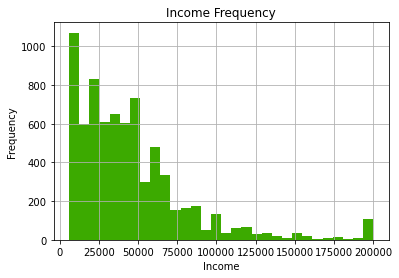

In [6]:
fig, ax = plt.subplots()
df["Income"].hist(bins=30, color="#3CAA00")
ax.set_title("Income Frequency")
ax.set_ylabel("Frequency")
ax.set_xlabel("Income")

In [7]:
quantile_list = [0, .25, .50, .75, 1.]
quantiles = df["Income"].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0.5, 0, 'Income')

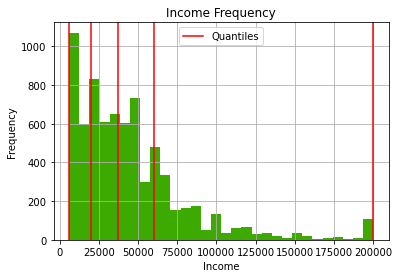

In [8]:
fig, ax = plt.subplots()
df["Income"].hist(bins=30, color="#3CAA00")

for quantile in quantiles:
    qvl = plt.axvline(quantile, color="r")
ax.legend([qvl], ["Quantiles"], fontsize=10)
ax.set_title("Income Frequency")
ax.set_ylabel("Frequency")
ax.set_xlabel("Income")

In [11]:
quantile_labels = ["0-25Q", "25-50Q", "50-75Q" ,"75-100Q"]
df["Income_quantile_range"] = pd.qcut(df["Income"], q=quantile_list)
df["Income_quantile_label"] = pd.qcut(df["Income"], q=quantile_list, labels=quantile_labels)

df[["ID.x", "Age", "Income", "Income_quantile_range", "Income_quantile_label"]].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


## Observations

- serie.quantile(quantiles)
    Will return the respective quantiles of the value in the series, in relation with the value given in the parameter quantiles

- pd.qcut()
    Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
    
    Parameters:
        - q (list): array with the quantiles values
        - labels (list): list with the respective labels for the quantile ranges